In [17]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/is_lab3')

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
from sklearn.model_selection import train_test_split

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 60000,
                                                    random_state = 7)
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)
Shape of X test: (10000, 28, 28)
Shape of y test: (10000,)


In [20]:
# Зададим параметры данных и модели
num_classes = 10
input_shape = (28, 28, 1)

# Приведение входных данных к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255

# Расширяем размерность входных данных, чтобы каждое изображение имело
# размерность (высота, ширина, количество каналов)

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)

# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (60000, 28, 28, 1)
Shape of transformed X test: (10000, 28, 28, 1)
Shape of transformed y train: (60000, 10)
Shape of transformed y test: (10000, 10)


In [21]:
# создаем модель
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation="softmax"))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# компилируем и обучаем модель
batch_size = 512
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.6299 - loss: 1.2590 - val_accuracy: 0.9473 - val_loss: 0.1893
Epoch 2/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9374 - loss: 0.2104 - val_accuracy: 0.9685 - val_loss: 0.1111
Epoch 3/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9607 - loss: 0.1312 - val_accuracy: 0.9757 - val_loss: 0.0825
Epoch 4/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9687 - loss: 0.1022 - val_accuracy: 0.9788 - val_loss: 0.0674
Epoch 5/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9702 - loss: 0.0913 - val_accuracy: 0.9812 - val_loss: 0.0597
Epoch 6/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9756 - loss: 0.0814 - val_accuracy: 0.9843 - val_loss: 0.0522
Epoch 7/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9783 - loss: 0.0720 - val_accuracy: 0.9837 - val_loss: 0.0488
Epoch 8/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9802 - loss: 0.0644 - val_acc

In [23]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0462
Loss on test data: 0.04353996366262436
Accuracy on test data: 0.9876000285148621


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
NN output: [[4.8054830e-04 4.6004916e-05 9.9381435e-01 4.3485279e-04 1.4458959e-04
  4.9780807e-05 2.4334698e-03 8.0680138e-06 2.3864885e-03 2.0190493e-04]]


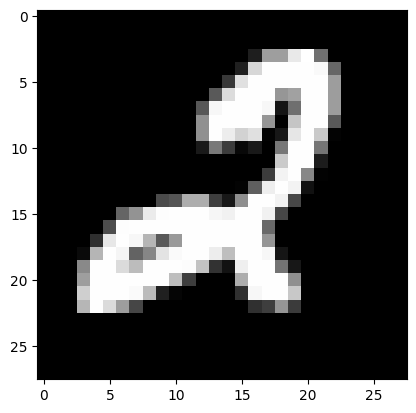

Real mark:  2
NN answer:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
NN output: [[2.1822505e-04 1.3631233e-02 2.7562436e-02 8.6995798e-01 6.5456913e-03
  2.4161236e-02 1.1778784e-03 3.9153613e-04 4.9376119e-02 6.9777733e-03]]


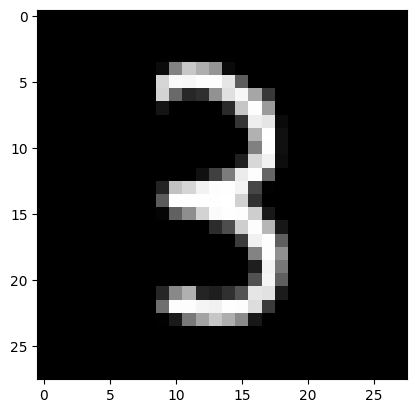

Real mark:  3
NN answer:  3


In [33]:
# вывод тестового изображения и результата распознавания
for n in [222,333]:
  result = model.predict(X_test[n:n+1])
  print('NN output:', result)
  plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  print('Real mark: ', np.argmax(y_test[n]))
  print('NN answer: ', np.argmax(result))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       968
           1       1.00      0.99      0.99      1087
           2       0.99      0.99      0.99      1000
           3       0.99      0.98      0.99      1039
           4       0.99      0.99      0.99       966
           5       0.98      0.99      0.99       908
           6       0.99      0.99      0.99       972
           7       0.98      0.99      0.98      1060
           8       0.98      0.98      0.98      1015
           9       0.98      0.98      0.98       985

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



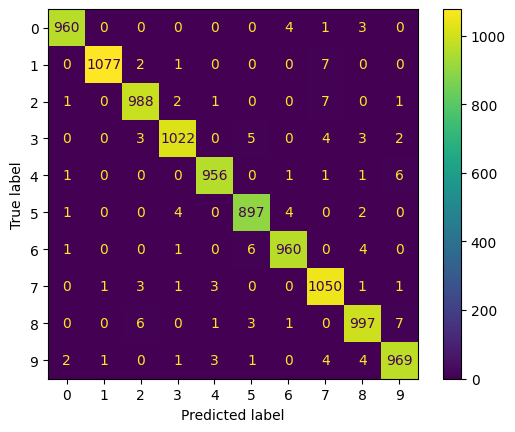

In [26]:
# истинные метки классов
true_labels = np.argmax(y_test, axis=1)
# предсказанные метки классов
predicted_labels = np.argmax(model.predict(X_test), axis=1)
# отчет о качестве классификации
print(classification_report(true_labels, predicted_labels))
# вычисление матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# отрисовка матрицы ошибок в виде "тепловой карты"
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()
plt.show()


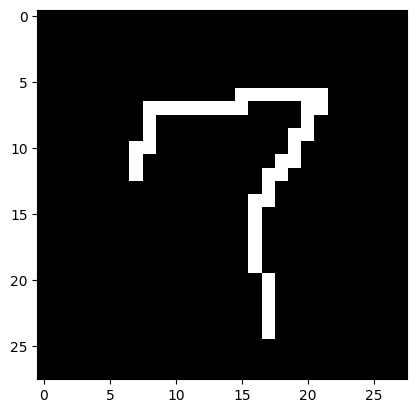

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
I think it's  7


In [27]:
# загрузка собственного изображения
from PIL import Image
file_data = Image.open('7.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)
# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = np.reshape(test_img, (1,28,28,1))
# распознавание
result = model.predict(test_img)
print('I think it\'s ', np.argmax(result))

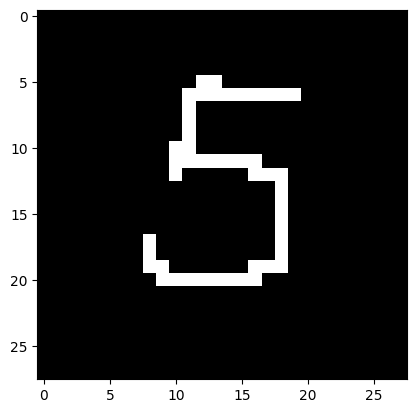

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
I think it's  5


In [28]:
# загрузка собственного изображения
from PIL import Image
file_data = Image.open('5.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)
# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = np.reshape(test_img, (1,28,28,1))
# распознавание
result = model.predict(test_img)
print('I think it\'s ', np.argmax(result))

In [29]:
model = keras.models.load_model("best_model.keras")
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,512 (931.69 KB)

 Trainable params: 238,510 (931.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [30]:
# развернем каждое изображение 28*28 в вектор 784
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 60000,
                                                    random_state = 7)
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X train:', X_test.shape)

# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (60000, 784)
Shape of transformed X train: (10000, 784)
Shape of transformed y train: (60000, 10)
Shape of transformed y test: (10000, 10)


In [31]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9016 - loss: 0.3667
Loss on test data: 0.37091827392578125
Accuracy on test data: 0.9013000130653381
